## 📖 Background
You work for an international HR consultancy helping companies attract and retain top talent in the competitive tech industry. As part of your services, you provide clients with insights into industry salary trends to ensure they remain competitive in hiring and compensation practices.

Your team wants to use a data-driven approach to analyse how various factors—such as job role, experience level, remote work, and company size—impact salaries globally. By understanding these trends, you can advise clients on offering competitive packages to attract the best talent.

In this competition, you’ll explore and visualise salary data from thousands of employees worldwide. f you're tackling the advanced level, you'll go a step further—building predictive models to uncover key salary drivers and providing insights on how to enhance future data collection.

## 📄 Executive Summary 

The International HR consultancy company posted publicly accessible data to compare data-based jobs around the world. Now that we are able to read in the data and compare several values and segments, we outlined a three tasks to complete, in the hopes of getting a better understanding of data salaries. 

**Task 1**  
_How many records are in the dataset, and what is the range of years covered?_  

To answer this question, we outlined the answer under the Task 1 Final Output Header. The total number of records in the dataset is **57,194**. The range of years covered in the dataset is **2020 to 2024**. 
  

**Task 2**  
_What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?_  

To answer this question, we outlined the answer under the Task 2 Final Output Header. The average salary of a Data Scientist role is **\$156,492.68**. The average salary of Data Scientist roles is **\$146,065.09**. Data Scientist roles on average, earned more money. After removing outliers, statistically testing suggested this difference was significant.  
  

**Task 3**  
_How many full-time employees based in the US work 100% remotely?_  

To answer this question, we outlined the answer under the Task 3 Final Output Header. The total number of full time, US-based workers that are 100% remote is **11,125**. 

In [38]:
# imported used packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the data
salaries_df = pd.read_csv('salaries.csv')
salaries_df

## 💾 The Data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

## Task 1

How many records are in the dataset, and what is the range of years covered?

In this first task, there are two simple questions we need to answer. 

To answer the first question, we will identify the number of records in the dataframe use the shape method. Then, to answer the second question, we will find the minimum and maximum value in the work_year column. We will take the difference and identify the numerical range of data. 

In [33]:
# we will need to find the number of records
number_of_records = salaries_df.shape[0]

In [34]:
# now we will identify the earliest and latest years
recent = salaries_df['work_year'].max()
earliest = salaries_df['work_year'].min()

year_range = recent - earliest

#### Task 1 Final Output

In [44]:
# final output
print(f"The total number of records in the dataframe is: {number_of_records}.")
print(f"The earliest year in the dataframe is {earliest}, while the most recent year in the dataframe is {recent}. The difference of these years represents a range of {year_range} years.")

The total number of records in the dataframe is: 57194.
The earliest year in the dataframe is 2020, while the most recent year in the dataframe is 2024. The difference of these years represents a range of 4 years.


## Task 2

What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?

For this second task, there are two more questions we need to tackle. For the first question, we will isolate the data frame for the two roles identified here. Then, we will calculate their mean values for salary. For the second question, we will make a direct comparison of the mean values through some statistical testing. 

In [6]:
# first we will calculate the data scientists average salary
check_ds = salaries_df[salaries_df['job_title'].str.contains('data scientist', case=False)]
check_ds['job_title'].unique()

array(['Data Scientist', 'AI Data Scientist', 'Data Scientist Lead',
       'Lead Data Scientist', 'Applied Data Scientist',
       'Marketing Data Scientist', 'Principal Data Scientist',
       'Staff Data Scientist'], dtype=object)

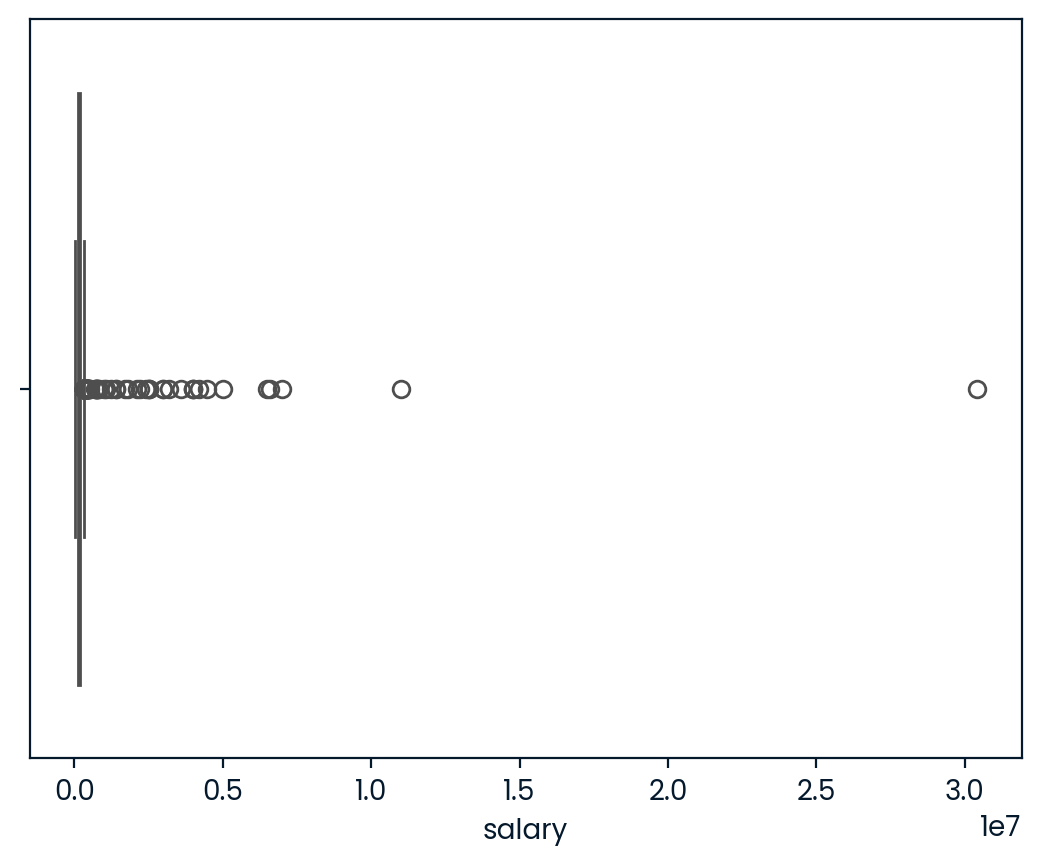

In [7]:
# check the distribution of any outliers
sns.boxplot(data=check_ds, x='salary')
plt.show()

In [22]:
# determine the cutoff for these outlier salaries
cut75 = np.percentile(check_ds['salary'], 75) 
cut25 = np.percentile(check_ds['salary'], 25)
iqr = cut75 - cut25
max_cut = cut75 + iqr * 1.5
min_cut = cut25 - iqr * 1.5

# outlier cutoff, remove those salaries that fall outside the 75/25th percentiles +/- IQR * 1.5
check_ds = check_ds[(check_ds['salary'] < max_cut) & (check_ds['salary'] > min_cut)]
check_ds

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
72,2024,SE,FT,Data Scientist,232000,USD,232000,US,0,US,M
73,2024,SE,FT,Data Scientist,129000,USD,129000,US,0,US,M
74,2024,EN,FT,Data Scientist,110240,USD,110240,US,0,US,M
75,2024,EN,FT,Data Scientist,39500,USD,39500,US,0,US,M
76,2024,SE,FT,Data Scientist,225000,USD,225000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
57181,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
57184,2021,SE,FT,Data Scientist,168000,USD,168000,JP,0,JP,S
57185,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
57190,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L


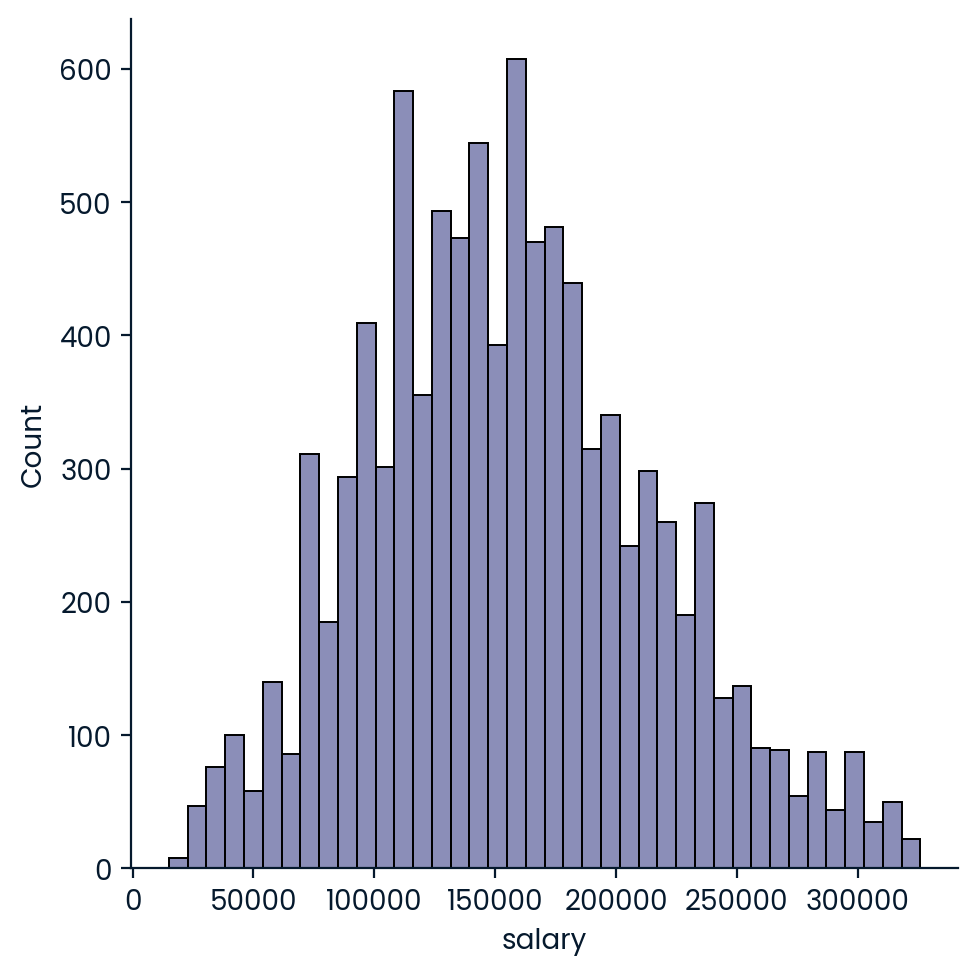

In [9]:
# check distribution
sns.displot(data=check_ds, x='salary')
plt.show()

In [10]:
# this distribution looks much better now
ds_salary = check_ds['salary'].mean()

# final output
print(f"The average salary of Data Scientist positions in the dataset is ${ds_salary.round(2)}.")

The average salary of Data Scientist positions in the dataset is $156492.68.


In [11]:
# now let's repeat this for the data engineers
check_de = salaries_df[salaries_df['job_title'].str.contains('data engineer', case=False)]
check_de['job_title'].unique()

array(['Data Engineer', 'Big Data Engineer', 'Consultant Data Engineer',
       'Azure Data Engineer', 'Principal Data Engineer',
       'Software Data Engineer', 'Cloud Data Engineer',
       'BI Data Engineer', 'Marketing Data Engineer',
       'Lead Data Engineer'], dtype=object)

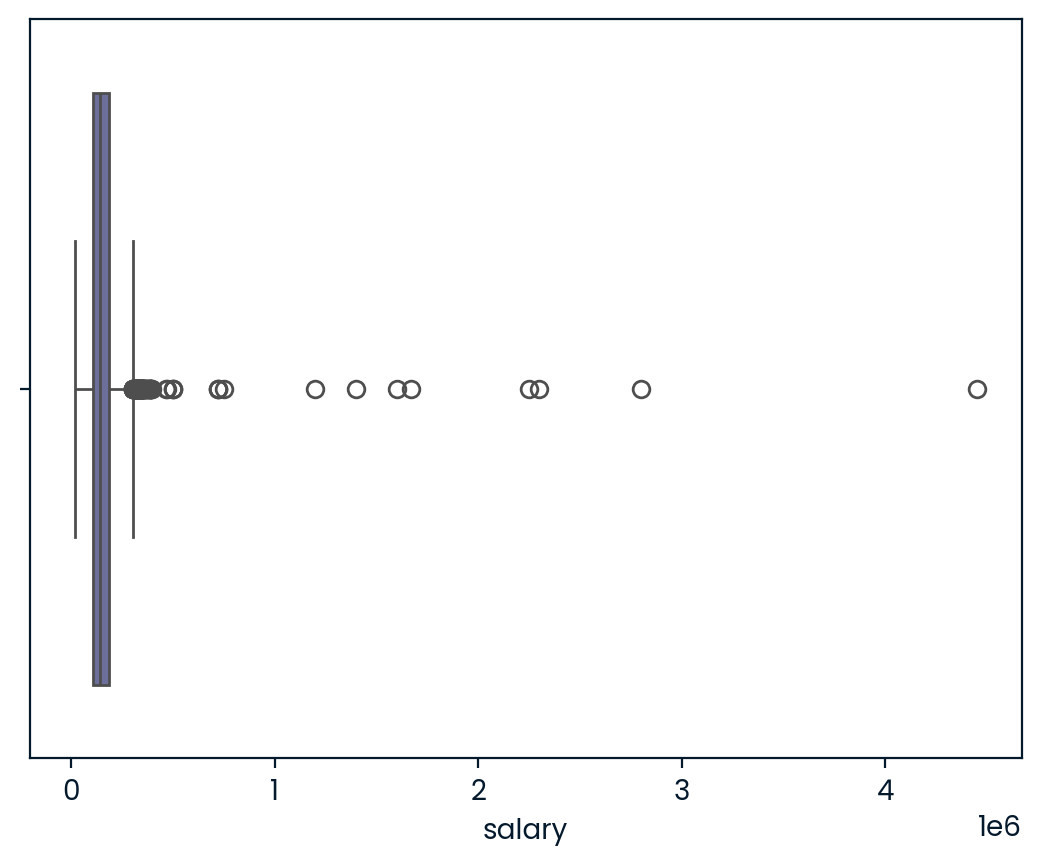

In [12]:
# check distribution for outlier salaries for data engineers
sns.boxplot(data=check_de, x='salary')
plt.show()

In [13]:
# same thing as before, let's remove the outliers and re-calculate the distribution
cut75 = np.percentile(check_de['salary'], 75)
cut25 = np.percentile(check_de['salary'], 25)
# calculate iqr
iqr = cut75 - cut25
max_cut = cut75 + iqr * 1.5
min_cut = cut25 - iqr * 1.5

# remove outlier data
check_de = check_de[(check_de['salary'] < max_cut) & (check_de['salary'] > min_cut)]
check_de

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
22,2024,SE,FT,Data Engineer,110000,USD,110000,US,0,US,M
23,2024,SE,FT,Data Engineer,110000,USD,110000,US,0,US,M
48,2024,MI,FT,Data Engineer,204000,USD,204000,US,0,US,M
49,2024,MI,FT,Data Engineer,145000,USD,145000,US,0,US,M
50,2024,SE,FT,Data Engineer,250200,USD,250200,AU,0,AU,M
...,...,...,...,...,...,...,...,...,...,...,...
57157,2021,SE,FT,Data Engineer,65000,EUR,76833,RO,50,GB,S
57160,2021,MI,FT,Big Data Engineer,18000,USD,18000,MD,0,MD,S
57178,2021,MI,FT,Data Engineer,38400,EUR,45391,NL,100,NL,L
57182,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M


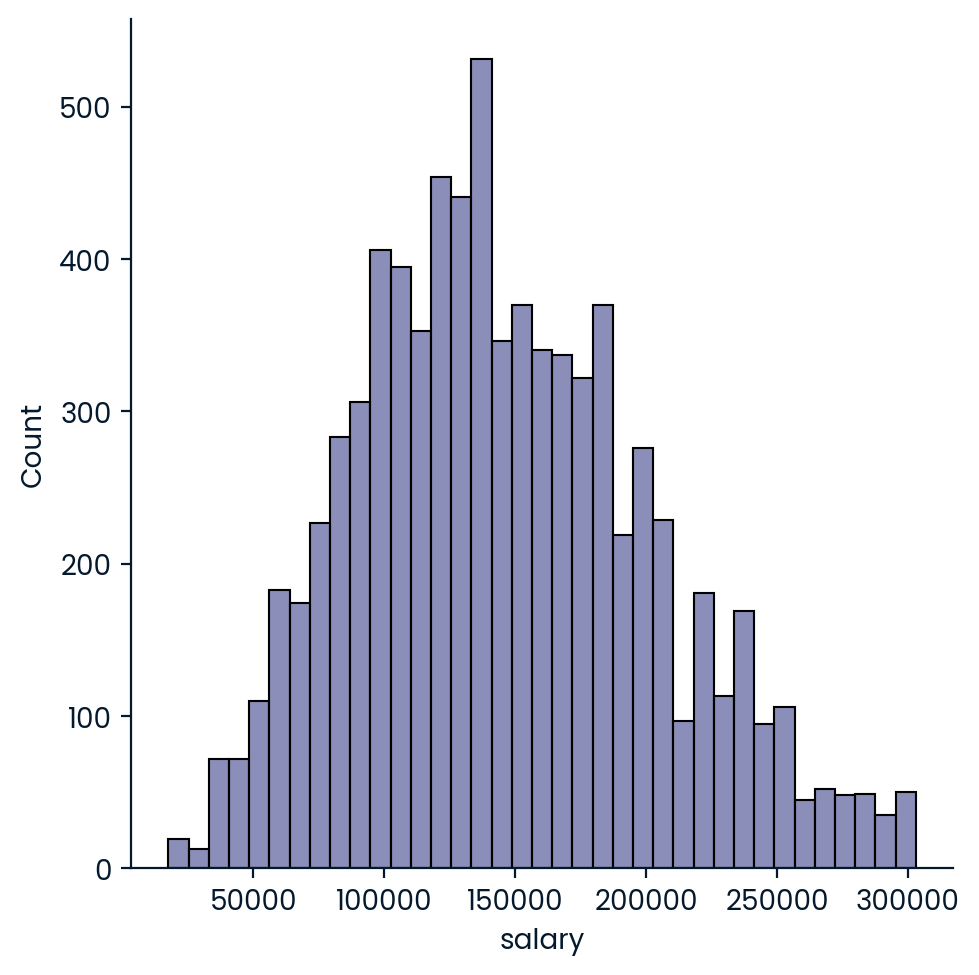

In [14]:
# lets check the distribution
sns.displot(data=check_de, x='salary')
plt.show()

In [15]:
# this distribution looks better as well
de_salary = check_de['salary'].mean()

# final output
print(f"The average salary of Data Engineer positions in the dataset is ${de_salary.round(2)}.")

The average salary of Data Engineer positions in the dataset is $146065.09.


We calculated the difference in the average salaries between the two job titles. However, let's compare whether or not the difference is significant. 

Since we already removed outlier and ensured the data follows a normal distribution, we can run normal t-tests.

In [18]:
# import statistical test, compare the two salary groups
from scipy.stats import ttest_ind

p_val = ttest_ind(check_ds['salary'], check_de['salary'])[1]

2.4397599743677279e-32

#### Task 2 Final Output

In [45]:
# compare overview salary
if ds_salary > de_salary:
    if p_val < 0.05:
    	print(f"According to the salary data, a Data Scientist earns more on average than a Data Engineer. The t-test suggests this difference is statistically significant (p = {p_val}).")
    else:
        print("According to the salary data, a Data Scientist earns more on average than a Data Engineer. However, the t-test suggests this difference is not statistically significant (p = {p_val}).")
else:
    if p_val < 0.05:
        print("According to the salary data, a Data Engineer earns more on average than a Data Scientist. The t-test suggests this difference is statistically significant (p = {p_val}).")
    else:
        print("According to the salary data, a Data Engineer earns more on average than a Data Scientist. However, the t-test suggests this difference is not statistically significant (p = {p_val}).")
        

According to the salary data, a Data Scientist earns more on average than a Data Engineer. The t-test suggests this difference is statistically significant (p = 2.4397599743677279e-32).


## Task 3

How many full-time employees based in the US work 100% remotely?

For this third and final task, we have one final question to answer. We need to determine the number of full time and 100% remote workers based in the United States. This will be a simple filtering exercise to determine the count values. 

In [24]:
# first let's check the spelling of employee residence to ensure we have a consistent filter
salaries_df['employee_residence'].unique()

array(['US', 'CA', 'AU', 'HR', 'GB', 'AT', 'DE', 'MX', 'CH', 'NL', 'FR',
       'PL', 'IE', 'AR', 'IT', 'ZA', 'SK', 'ES', 'FI', 'PH', 'BR', 'CO',
       'LT', 'NZ', 'KE', 'PT', 'IL', 'SG', 'SE', 'IN', 'CL', 'UA', 'TR',
       'LV', 'PK', 'JP', 'AM', 'HN', 'GR', 'LB', 'LU', 'EG', 'MT', 'CZ',
       'BE', 'CY', 'BG', 'RO', 'VE', 'KR', 'BM', 'VN', 'RS', 'DK', 'GE',
       'AE', 'SA', 'OM', 'BA', 'EE', 'HU', 'NG', 'UG', 'SI', 'MU', 'TH',
       'QA', 'RU', 'TN', 'GH', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'HK',
       'CF', 'KW', 'IR', 'AS', 'CN', 'CR', 'PR', 'BO', 'DO', 'ID', 'MY',
       'DZ', 'IQ', 'JE'], dtype=object)

In [26]:
# so we now know to use 'US' as our filter for residence
# let's repeat the same thing for employment type
salaries_df['employment_type'].unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

In [27]:
# as mentioned above, 'FT' is the filter for full time work
# finally let's repeat this for remote work ratio
salaries_df['remote_ratio'].unique()

array([  0, 100,  50])

For our next bit of code, we determined what values we will use in our filter statements. 

* For employee_residence, we will filter for 'US'
* For employment_type, we will filter for 'FT'
* For remote_ratio, we will filter for 100

Then, once we create this dataframe, we can count the number of rows and answer the question. 

In [28]:
# filter based on outlined conditions
us_remote = salaries_df[
    (salaries_df['employee_residence'] == 'US') &
    (salaries_df['employment_type'] == 'FT') &
    (salaries_df['remote_ratio'] == 100)
]
us_remote.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16,2024,SE,FT,Software Engineer,130000,USD,130000,US,100,US,M
17,2024,SE,FT,Software Engineer,70000,USD,70000,US,100,US,M
18,2024,SE,FT,Solution Architect,169700,USD,169700,US,100,US,M
19,2024,SE,FT,Solution Architect,118800,USD,118800,US,100,US,M
24,2024,SE,FT,Analyst,105000,USD,105000,US,100,US,M


#### Task 3 Final Output

In [47]:
# let's determine the final count
number_us = us_remote.shape[0]

# final output
print(f"From the dataset, the total number of full time, US-based workers that are 100% remote is: {number_us}.")

From the dataset, the total number of full time, US-based workers that are 100% remote is: 11125.
